## Introduction

### This project focuses on building a price prediction model for used cars using supervised learning techniques
### The primary goal is to predict the price of a used car. 

## Objective
## By the end of this project, we aim to have a reliable price prediction model that 
## can accurately predict the price of a used car based on its features.
    
### our preformance measure for regression problems is the Root Mean Square Error (RMSE)
1. **Data Preprocessing**: Cleaning and preparing the data for modeling.
2. **Feature Engineering**: Creating new features or modifying existing ones to improve model performance.
3. **Model Selection**: Choosing the appropriate regression algorithms.
4. **Model Training**: Training the model on the training dataset.
5. **Model Evaluation**: Evaluating the model's performance using appropriate metrics.
6. **Model Tuning**: Fine-tuning the model to improve its accuracy.



### About the Data

- **Name** (`object`): Name of the car.

- **Location** (`object`): Location in which the car is being sold or is available for purchase.

- **Year** (`int64`): The year the car was manufactured.

- **Kilometers_Driven** (`int64`): The total distance the car has traveled in kilometers.

- **Fuel_Type** (`object`): The type of fuel used by the car.

- **Transmission** (`object`): The type of transmission used by the car.

- **Owner_Type** (`object`): Whether the ownership is firsthand, secondhand, or other.

- **Mileage** (`object`): The standard mileage offered by the car company in kmpl or km/kg.

- **Engine** (`object`): The displacement volume of the engine in CC.

- **Power** (`object`): The maximum power of the engine in bhp.

- **Seats** (`float64`): The number of seats in the car.

- **New_Price** (`object`): The price of a new car of the same model.

- **Price** (`float64`): The price of the used car in INR Lakhs.

In [71]:
# modules used in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### let's load used_cars data frame using pandas

In [2]:
df = pd.read_csv('../DataSets/Used_Cars (1).csv')

### let't take a quick look of the data structure 

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Good we can see that we have 14 columns or attributes
### but the first column is unnamed

In [4]:
# let's name the first column as 'car_id'
# it seems like the first column is an index column or a car_id column
# anyway we will drop this column later
df.rename(columns={'Unnamed: 0': 'car_index'}, inplace=True)

### let's see some info about the data frame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_index          6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


### ok, so we have 14 attributes and 6019 instances in the dataset
### there null values in the 'Mileage', 'Engine', 'Power', 'Seats' and 'New_Price'
### we will take care of all these nulls, but les't foucs now on understanding the data

In [6]:
# let's use the describe method to get a summary of the numerical columns
df.describe()

,car_index,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


--------------------------------------------------------------------------------------------------
### we can see from the describe method that the oldest car in the dataset was made in 1998.
### and the newest car was made in 2019. The average year of manufacture is 2014.
### which is seems fine for now.
--------------------------------------------------------------------------------------------------
### we can see also that the highest price is 160.0000 and the lowest price is 0.440000
### and the average price is 5.640000. we will take a closer look later.
--------------------------------------------------------------------------------------------------
### Seats columnn have a max value of 10.
### and a minimum value of 0 which is not possible.
--------------------------------------------------------------------------------------------------
## in the Kilometers_Driven have hiest value 6.500000e+06 it may be an outlier
## and min value is 1.710000e+02 which is also not possible so we will check the unique values in this column.
--------------------------------------------------------------------------------------------------


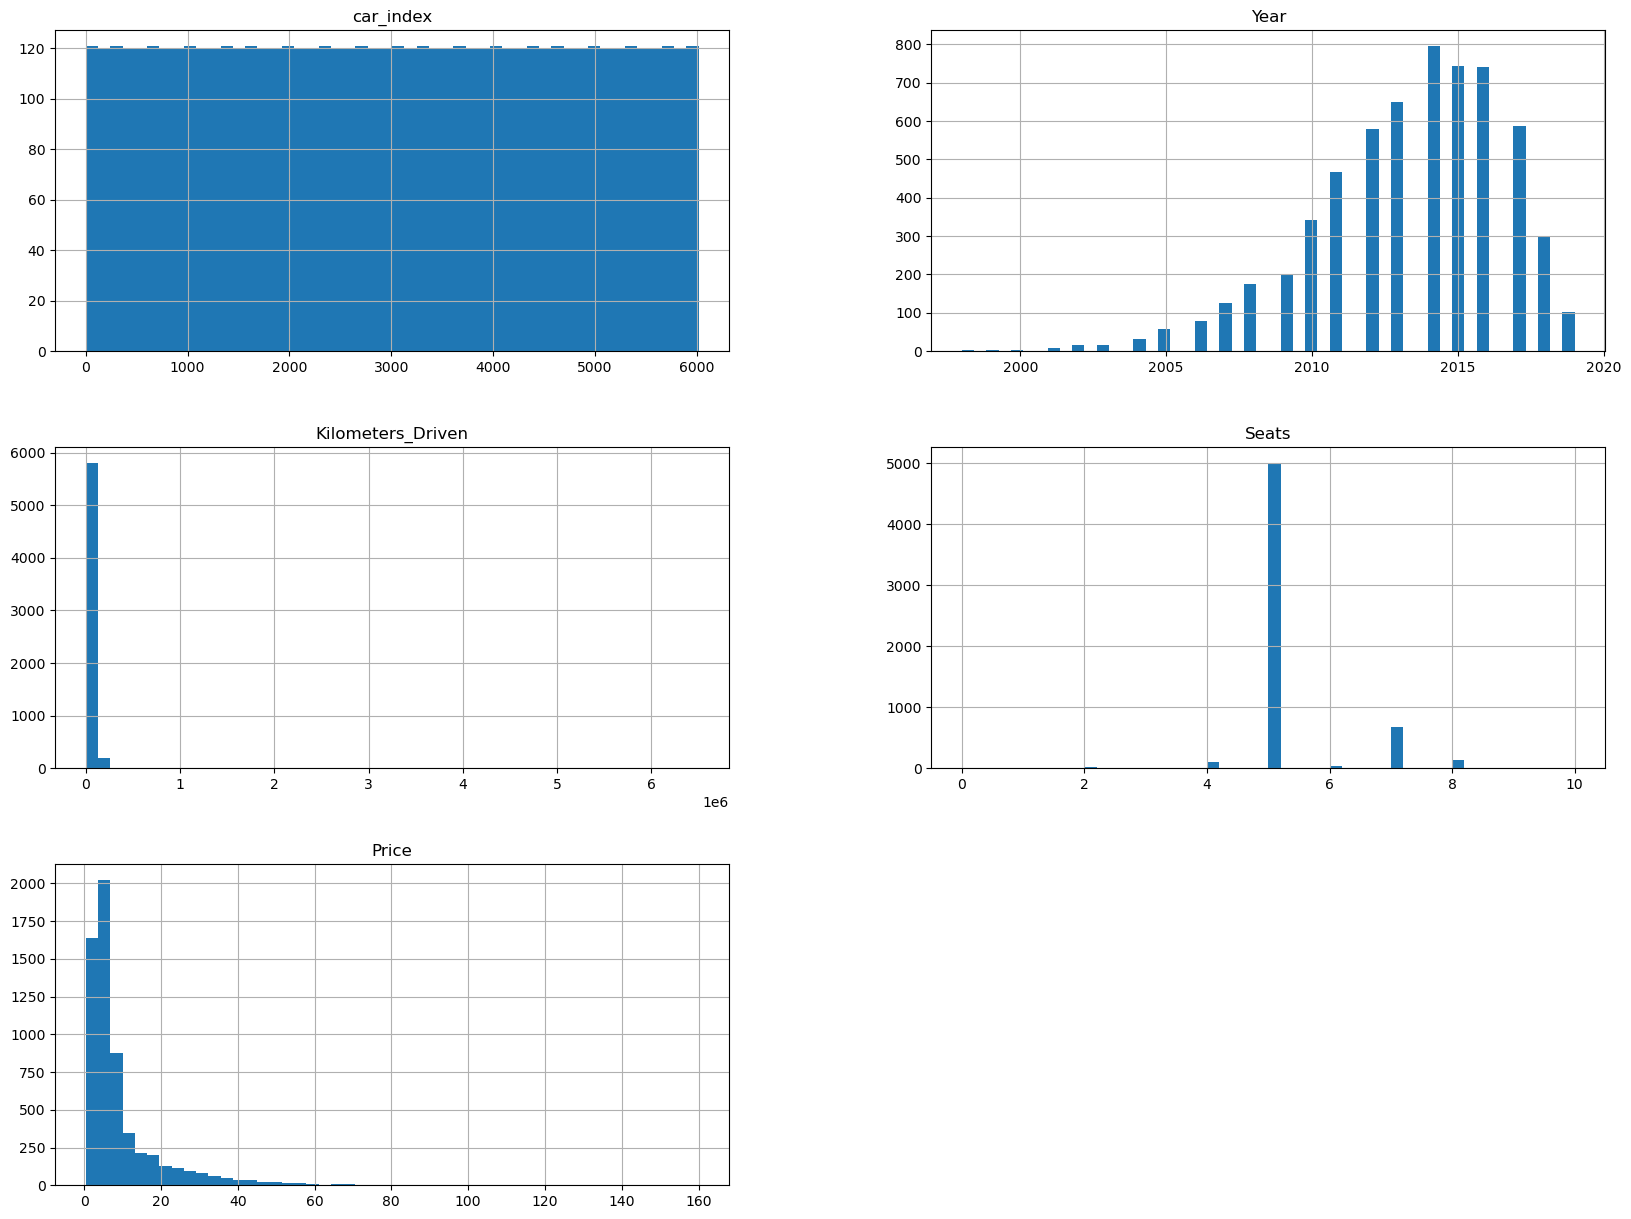

In [7]:
# let's plot a histogram of the numerical columns to get a sense of the distribution
df.hist(bins=50, figsize=(20,15))
xlabel = plt.xlabel('Frequency')
plt.show()

## about the histogram
---------------------------------------------------------------------------------------------------------------
### first we will drop the 'car_id' column as it is not useful for our analysis.

### the 'Year' distribution is right-skewed, which means that most cars in the dataset are newer models.

### the 'Price' distribution is left-skewed, which means that most cars in the dataset are cheaper.

### the 'Seat' distribution is medium-skewed, which means that most cars in the dataset have 5 seats.

In [8]:
# the car_id column is not useful for our analysis, so we will drop it.
df.drop('car_index', axis=1, inplace=True)

# ! before we proceed, let's create a test set and set it aside.
## # we will use 80% of the data for training and 20% for testing.
## # our target variable is the 'price' column.


In [9]:
# using the scikit-learn library to split the dataset into training and testing sets
X = df.drop('Price', axis=1) # features
y = df[['Price']] # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# let's check the shape of the training and testing sets

In [10]:
print('Training set:', X_train.shape, y_train.shape)
print('Testing set:', X_test.shape, y_test.shape)

Training set: (4815, 12) (4815, 1)
Testing set: (1204, 12) (1204, 1)


# let's create a copy of the training set to explore the data without harming the original dataset

In [11]:
df_train = df.copy()

# let's visualize the relationship between the 'Year' and 'Price' columns


In [12]:
fig = px.scatter(df_train, x='Year', y='Price', color='Year',
                 title='سنة الصنع vs السعر',
                 labels={'Year': 'سنة الصنع', 'Price': 'السعر بالروبية الهندية'})
fig.show()

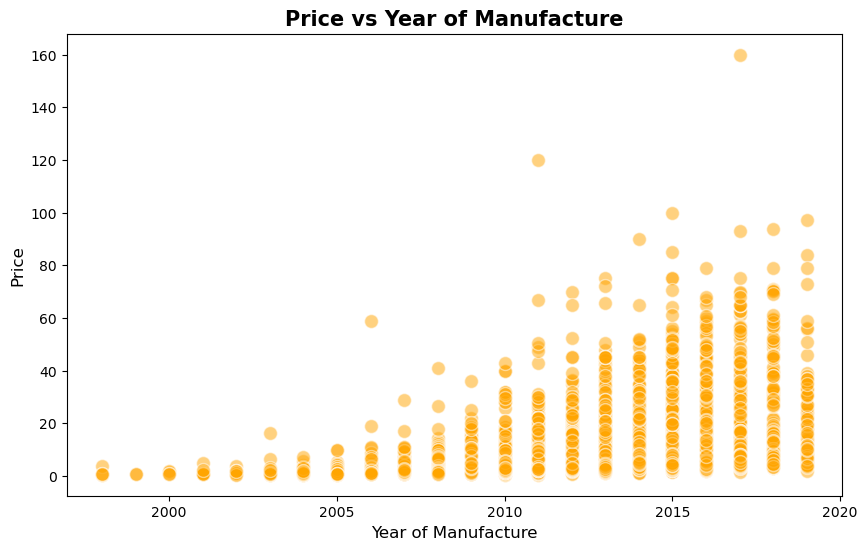

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['Year'], df_train['Price'], alpha=0.5, edgecolors='w', s=100, color='orange')
plt.title('Price vs Year of Manufacture', fontsize=15, fontweight='bold')

plt.xlabel('Year of Manufacture', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.show()

### now let's how much every attribute correlates with the our target variable 'Price' using a heatmap


In [14]:
corr_matrix = df_train.corr(numeric_only=True)
corr_matrix["Price"].sort_values(ascending=False)

Price                1.000000
Year                 0.305327
Seats                0.052225
Kilometers_Driven   -0.011493
Name: Price, dtype: float64

### we can see that the 'Year' column has the highest positive correlation with the 'Price'.
### and the 'Kilometers_Driven' column has the highest negative correlation with the 'Price'.
### it's means that the price of a car tends to increase with the year of manufacture.
### and the price of a car tends to decrease with the number of kilometers driven.

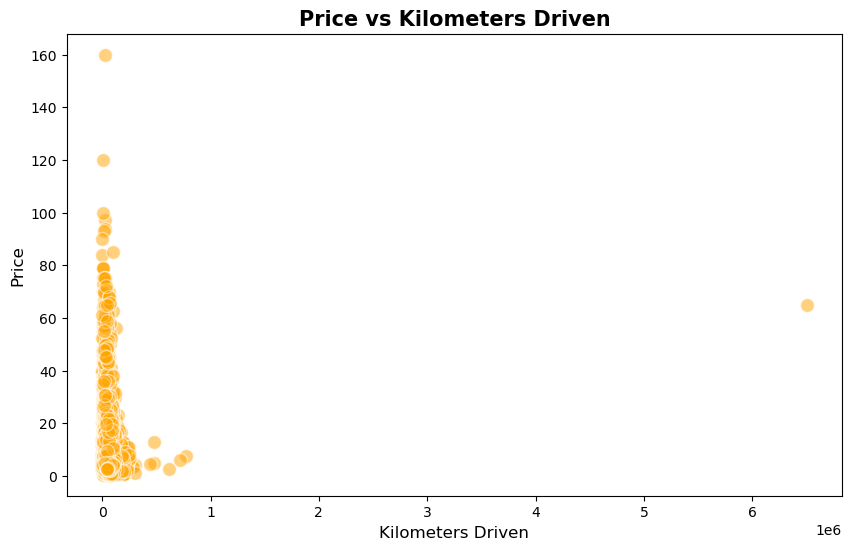

In [15]:
# so let's plot the relationship between the price and the kilometers_Driven
plt.figure(figsize=(10, 6))
plt.scatter(df_train['Kilometers_Driven'], df_train['Price'], alpha=0.5, edgecolors='w', s=100, color='orange')
plt.title('Price vs Kilometers Driven', fontsize=15, fontweight='bold')
xlabel = plt.xlabel('Kilometers Driven', fontsize=12)
ylabel = plt.ylabel('Price', fontsize=12)
 

## let's visualize the relationship between the price and the Location
## we will select top 7 locations with the highest average price

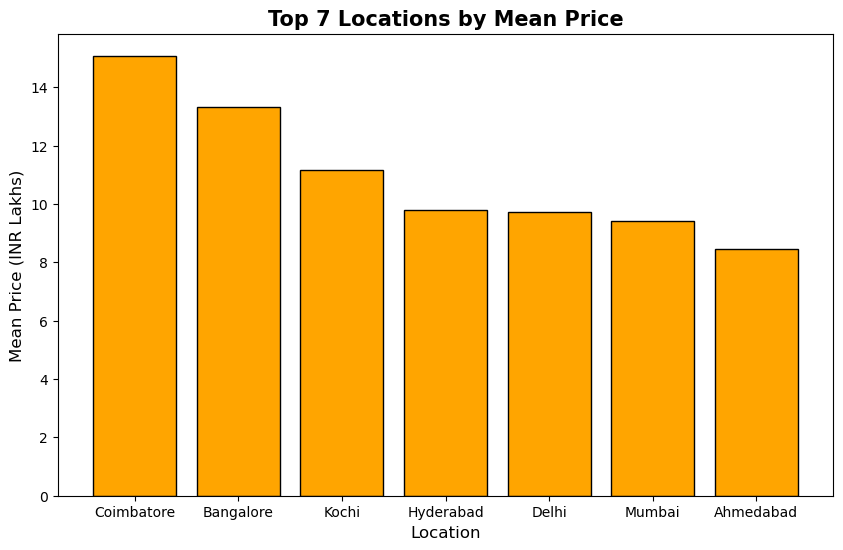

In [16]:
location_mean_price = df.groupby('Location')['Price'].mean().reset_index()

top_locations = location_mean_price.sort_values(by='Price', ascending=False).head(7)

# Visualization using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_locations['Location'], top_locations['Price'], color='orange', edgecolor='black')
plt.title('Top 7 Locations by Mean Price', fontsize=15, fontweight='bold')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Mean Price (INR Lakhs)', fontsize=12)
plt.show()

# now let's prepare the data for machine learning algorithms

# Data Cleaning

In [17]:
# let's copy the data to a new dataframe
used_cars_df = X_train.copy()

In [51]:
used_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4815 entries, 4248 to 860
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           4815 non-null   object 
 1   Year               4815 non-null   int64  
 2   Kilometers_Driven  4815 non-null   int64  
 3   Fuel_Type          4815 non-null   object 
 4   Transmission       4815 non-null   object 
 5   Owner_Type         4815 non-null   object 
 6   Mileage            4814 non-null   object 
 7   Engine             4784 non-null   object 
 8   Power              4784 non-null   object 
 9   Seats              4780 non-null   float64
 10  New_Price          661 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 451.4+ KB


# Name column is not useful for our analysis, so we will drop it.

In [19]:
# Name column is not useful for our analysis, so we will drop it.
used_cars_df.drop('', axis=1, inplace=True)

<Axes: xlabel='Location,Year'>

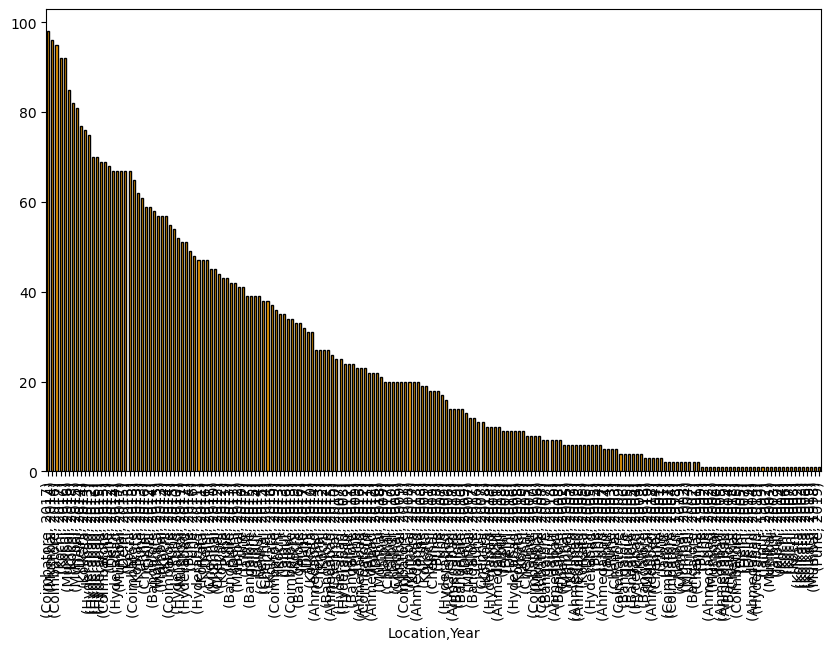

In [33]:
used_cars_df[['Location', 'Year']].value_counts().plot(kind='bar', figsize=(10, 6), color='orange', edgecolor='black')


## let's use the imputer class from the scikit-learn library to fill the missing values

In [44]:
numerical_cols = used_cars_df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
imputer.fit(used_cars_df[numerical_cols])


SimpleImputer()

## let's see the mean values of the numerical columns


In [45]:
imputer.statistics_

array([2.01339585e+03, 5.74243967e+04, 5.27761506e+00])

## we can reaplace the missing values with the mean value of each column

In [54]:
arr_mean = imputer.transform(used_cars_df[numerical_cols])
# we can replace the missing values with the mean values
used_cars_df[numerical_cols] = arr_mean

### the new_price column have > 4000 missing values we will prefer to drop it

In [53]:
used_cars_df.drop('New_Price', axis=1, inplace=True)

4154

<class 'pandas.core.frame.DataFrame'>
Index: 4815 entries, 4248 to 860
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           4815 non-null   object 
 1   Year               4815 non-null   float64
 2   Kilometers_Driven  4815 non-null   float64
 3   Fuel_Type          4815 non-null   object 
 4   Transmission       4815 non-null   object 
 5   Owner_Type         4815 non-null   object 
 6   Mileage            4814 non-null   object 
 7   Engine             4784 non-null   object 
 8   Power              4784 non-null   object 
 9   Seats              4815 non-null   float64
 10  New_Price          661 non-null    object 
dtypes: float64(3), object(8)
memory usage: 451.4+ KB


## Handling text and categorical attributes

In [57]:
## Handling text and categorical attributes
used_cars_cat = used_cars_df[['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power']]
used_cars_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4815 entries, 4248 to 860
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Location      4815 non-null   object
 1   Fuel_Type     4815 non-null   object
 2   Transmission  4815 non-null   object
 3   Owner_Type    4815 non-null   object
 4   Mileage       4814 non-null   object
 5   Engine        4784 non-null   object
 6   Power         4784 non-null   object
dtypes: object(7)
memory usage: 300.9+ KB


### we will encode the Transmission column using the LabelEncoder

In [63]:
label_encoder = LabelEncoder()
used_cars_df['Transmission_encoded'] = label_encoder.fit_transform(used_cars_df['Transmission'])

### let's see the Transmission after encoding

In [64]:
used_cars_df["Transmission_encoded"].value_counts()

Transmission_encoded
1    3452
0    1363
Name: count, dtype: int64

### now we will do some scaling on the 'Kilometers_Driven' column.

<Axes: >

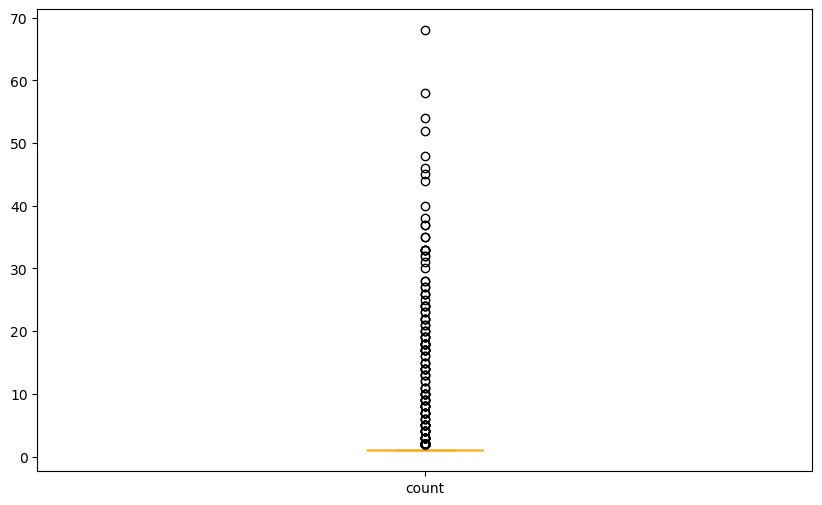

In [69]:
used_cars_df['Kilometers_Driven'].value_counts().plot(kind='box', figsize=(10, 6), color='orange')

### we can see that the 'Kilometers_Driven' column has some outliers.
### so we will do some scaling on this column using the RobustScaler because it is robust to outliers.

In [72]:
robust_scaler = RobustScaler()
used_cars_df['Kilometers_Driven_Scaled'] = robust_scaler.fit_transform(used_cars_df[['Kilometers_Driven']])